In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
test_sizes = [1,5,10,25,50,75,100,125,140,145,149]

In [3]:
def tpr(sample,target_class=0):
    # Actual cases
    subset = np.where(sample[:,0]==target_class)[0]
    num_true = len(subset)
    num_false_negatives = len(np.where(sample[subset,1]!=target_class)[0])
    num_true_positives = num_true - num_false_negatives
    # Uncomment to print the counts...
    # print(num_true,num_true_positives,num_false_negatives)

    # Cases we are not interested in
    subset = np.where(sample[:,0]!=target_class)[0]
    num_false = len(subset)
    num_true_negatives = len(np.where(sample[subset,1]!=target_class)[0])
    num_false_positives = num_false - num_true_negatives
    # Uncomment to print the counts
    # print(num_false,num_false_positives,num_true_negatives)

    # Definition of the false positive rate (want this to be low)
    try:
        true_positive_ratio = float(num_true_positives) / (float(num_true_positives) + float(num_false_negatives))
    except:
        true_positive_ratio = 1.0
    return true_positive_ratio * 100.0

# Runs the FPR calculation on -each- random
# sample - the average of these sample FPRs
# is the False Positive Rate
def calc_tpr(data,target_class=0,N=100):
    sample_size = int(data.shape[0] / N)
    nsamples = int(data.shape[0]/sample_size)
    return [tpr(data[s*sample_size:(s*sample_size)+sample_size,:],target_class) for s in range(0,nsamples)]

In [4]:
def fpr(sample,target_class=0):
    # Actual cases
    subset = np.where(sample[:,0]==target_class)[0]
    num_true = len(subset)
    num_false_negatives = len(np.where(sample[subset,1]!=target_class)[0])
    num_true_positives = num_true - num_false_negatives
    # Uncomment to print the counts...
    # print(num_true,num_true_positives,num_false_negatives)

    # Cases we are not interested in
    subset = np.where(sample[:,0]!=target_class)[0]
    num_false = len(subset)
    num_true_negatives = len(np.where(sample[subset,1]!=target_class)[0])
    num_false_positives = num_false - num_true_negatives
    # Uncomment to print the counts
    # print(num_false,num_false_positives,num_true_negatives)

    # Definition of the false positive rate (want this to be low)
    try:
        false_positive_ratio = float(num_false_positives) / (float(num_false_positives) + float(num_true_negatives))
    except:
        false_positive_ratio = 0.0
    return false_positive_ratio * 100.0

# Runs the FPR calculation on -each- random
# sample - the average of these sample FPRs
# is the False Positive Rate
def calc_fpr(data,target_class=0,N=100):
    sample_size = int(data.shape[0] / N)
    nsamples = int(data.shape[0]/sample_size)
    return [fpr(data[s*sample_size:(s*sample_size)+sample_size,:],target_class) for s in range(0,nsamples)]

In [9]:
# Class 2 TPR/FPR
fprs = np.array([calc_fpr(np.loadtxt("iris-results-%d.txt"%x),2) for x in test_sizes]).transpose()
tprs = np.array([calc_tpr(np.loadtxt("iris-results-%d.txt"%x),2) for x in test_sizes]).transpose()

In [10]:
fpr_means = np.mean(fprs,0)
tpr_means = np.mean(tprs,0)
fpr_stderr = np.std(fprs,0)/np.sqrt(100)
tpr_stderr = np.std(tprs,0)/np.sqrt(100)

In [11]:
# ROC is a normalized (0 to 1) estimate of the
# distance from the "worst case" of TPR=100% and
# FPR=0% - note that standard error is also
# appropriately scaled.
# Similar to the AUC measure used for other
# graded classifiers - 1 is best and 0 is
# worst, with .5 being at chance.
roc = np.sqrt((100.0-fpr_means)**2.0 + (0.0-tpr_means)**2.0) / np.sqrt(20000)
roc_stderr = (fpr_stderr + tpr_stderr) / 2.0 / np.sqrt(20000)

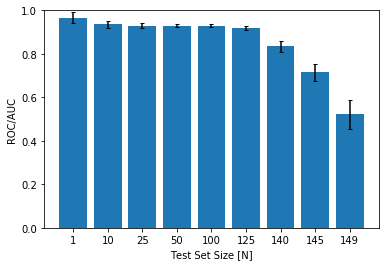

In [12]:
plt.bar([str(x) for x in test_sizes],roc,yerr=1.96*roc_stderr,capsize=2)
plt.ylim(0,1)
plt.ylabel("ROC/AUC")
plt.xlabel("Test Set Size [N]")
plt.show()